In [8]:
# 2. library(fpp2)에 있는 데이터 elecdaily에는 호주 빅토리아주에서 2014년에 일별 전기 수요 기록이 있다.
# 데이터의 첫 20일은 다음과 같이 볼 수 있다.

# http://www.sthda.com/english/articles/32-r-graphics-essentials/128-plot-time-series-data-using-ggplot/
library(fpp2)

daily20 <- head(elecdaily,20)
daily20
str(daily20)

Demand,WorkDay,Temperature
174.8963,0,26.0
188.5909,1,23.0
188.9169,1,22.2
173.8142,0,20.3
169.5152,0,26.1
195.7288,1,19.6
199.9029,1,20.0
205.3375,1,27.4
228.0782,1,32.4
258.5984,1,34.0


 Time-Series [1:20, 1:3] from 1 to 3.71: 175 189 189 174 170 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "Demand" "WorkDay" "Temperature"


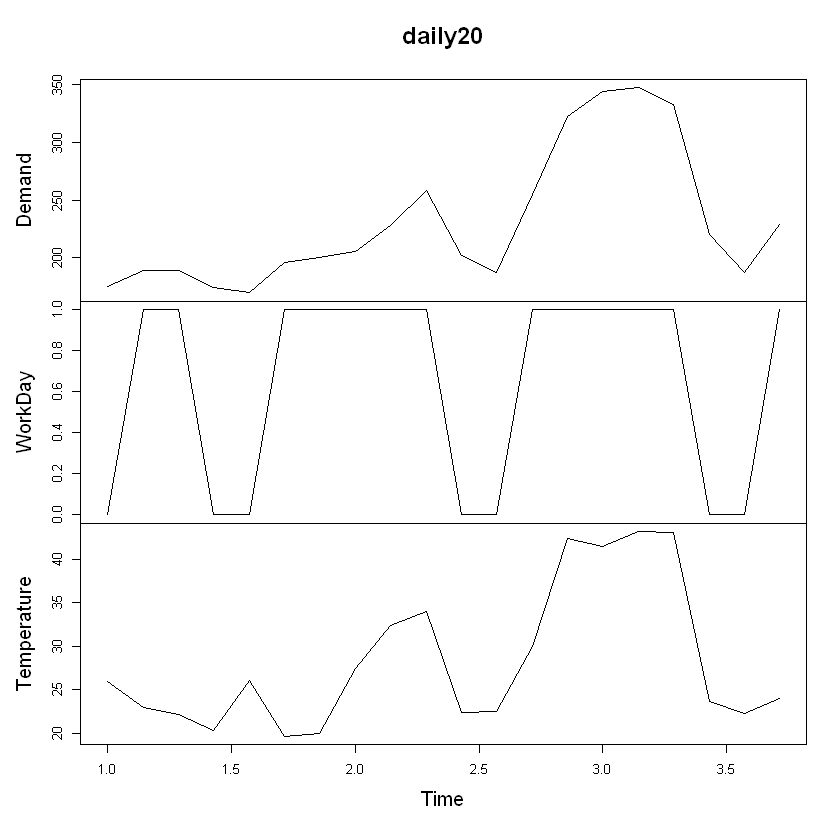

In [9]:
# (a) 데이터를 그래프로 나타내고 
plot(daily20)

In [10]:
df_daily20 <- cbind(time = c(time(daily20)), as.data.frame(x = daily20))
df_daily20
str(df_daily20)

time,Demand,WorkDay,Temperature
1.000000,174.8963,0,26.0
1.142857,188.5909,1,23.0
1.285714,188.9169,1,22.2
1.428571,173.8142,0,20.3
1.571429,169.5152,0,26.1
1.714286,195.7288,1,19.6
1.857143,199.9029,1,20.0
2.000000,205.3375,1,27.4
2.142857,228.0782,1,32.4
2.285714,258.5984,1,34.0


'data.frame':	20 obs. of  4 variables:
 $ time       : num  1 1.14 1.29 1.43 1.57 ...
 $ Demand     : num  175 189 189 174 170 ...
 $ WorkDay    : num  0 1 1 0 0 1 1 1 1 1 ...
 $ Temperature: num  26 23 22.2 20.3 26.1 19.6 20 27.4 32.4 34 ...



Call:
tslm(formula = Demand ~ Temperature, data = daily20)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.060  -7.117  -1.437  17.484  27.102 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.2117    17.9915   2.179   0.0428 *  
Temperature   6.7572     0.6114  11.052 1.88e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22 on 18 degrees of freedom
Multiple R-squared:  0.8716,	Adjusted R-squared:  0.8644 
F-statistic: 122.1 on 1 and 18 DF,  p-value: 1.876e-09


[1] 0.9335758

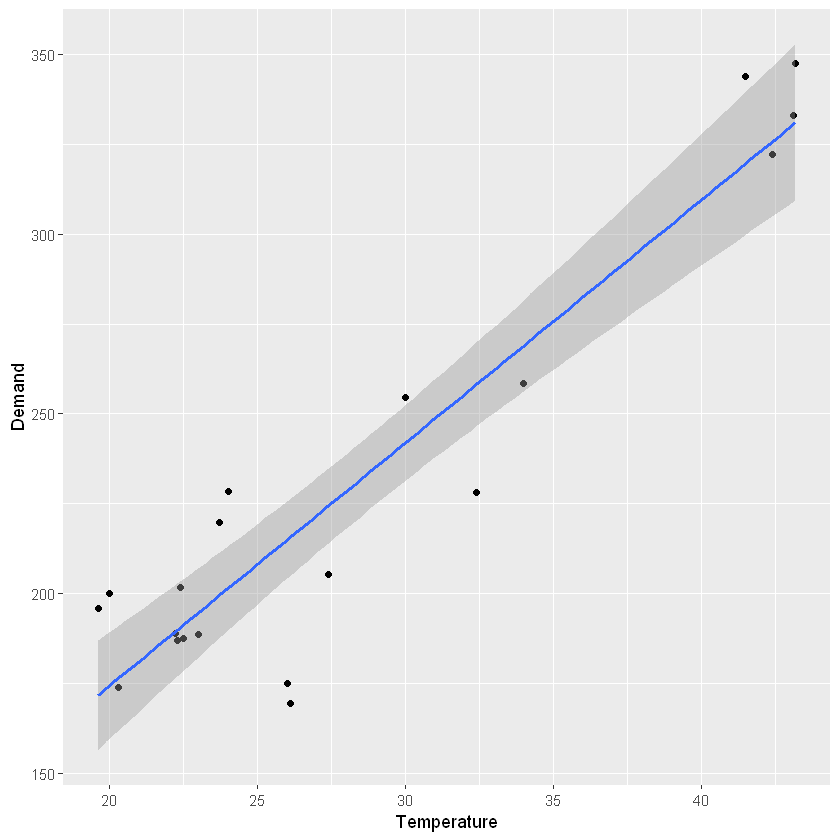

In [11]:
# 온도를 설명 변수로 사용하여 수요 값에 대한 회귀 모델을 찾아보라. 왜 음의 관계가 있는지 설명해보라. 
tslm_fit <- tslm(Demand ~ Temperature, data=daily20)
summary(tslm_fit)

cor(df_daily20$Temperature, df_daily20$Demand)

ggplot(df_daily20, aes(x = Temperature, y = Demand)) + 
geom_point() +
geom_smooth(method='lm')

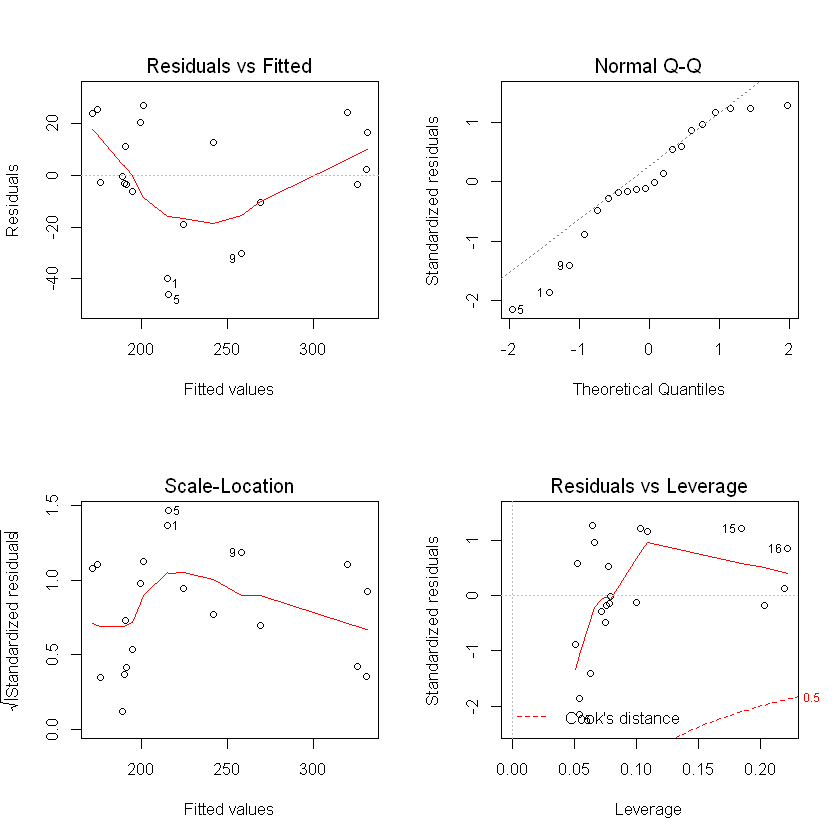

In [12]:
# (b) 잔차 그래프를 그려보고 모델이 적절한지, 이상값이나 영향력 있는 관측값이 있는지 설명하라.
layout(mat=matrix(c(1, 2,
                    3, 4), nrow=2, byrow = TRUE))
plot(tslm_fit)


	Breusch-Godfrey test for serial correlation of order up to 5

data:  Residuals from Linear regression model
LM test = 3.8079, df = 5, p-value = 0.5774



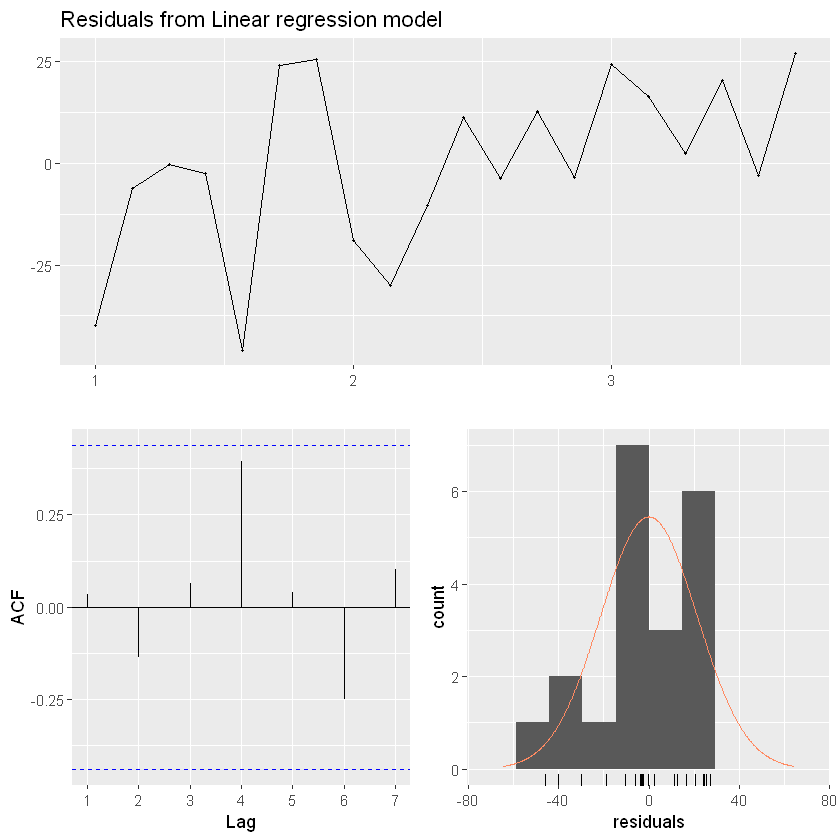

In [13]:
checkresiduals(tslm_fit)

In [15]:
# (c) 최고 기온이 15도일 때, 다음날의 전기 소비량을 예측하는 모델을 사용하고 이것을 최고 기온이
# 35도일 때 얻은 예측값과 비교해보라. 이러한 예측값이 신뢰할만한가? 얻은 예측값에 대한
# 예측구간을 구해보라. 다음의 R 코드로 시작할 수 있을 것이다. 

forecast(tslm_fit, newdata=data.frame(Temperature=c(15,35)))

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
3.857143       140.5701 108.6810 172.4591  90.21166 190.9285
4.000000       275.7146 245.2278 306.2014 227.57056 323.8586

In [20]:
# (d) elecdaily에 있는 모든 데이터를 가지고 수요 vs 기온 그래프를 그려보자. 이것이 어떤 의미가 있는지 설명하라. 

daily_all <- elecdaily
df_daily_all <- cbind(time = c(time(daily_all)), as.data.frame(x = daily_all))

head(df_daily_all)
str(daily_all)

tslm_all_fit <- tslm(Demand ~ Temperature, data=daily_all)
summary(tslm_all_fit)

time,Demand,WorkDay,Temperature
1.000000,174.8963,0,26.0
1.142857,188.5909,1,23.0
1.285714,188.9169,1,22.2
1.428571,173.8142,0,20.3
1.571429,169.5152,0,26.1
1.714286,195.7288,1,19.6


 Time-Series [1:365, 1:3] from 1 to 53: 175 189 189 174 170 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "Demand" "WorkDay" "Temperature"



Call:
tslm(formula = Demand ~ Temperature, data = daily_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.474 -15.719  -0.336  15.767 117.184 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 212.3856     5.0080  42.409   <2e-16 ***
Temperature   0.4182     0.2263   1.848   0.0654 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26.55 on 363 degrees of freedom
Multiple R-squared:  0.009322,	Adjusted R-squared:  0.006592 
F-statistic: 3.416 on 1 and 363 DF,  p-value: 0.0654


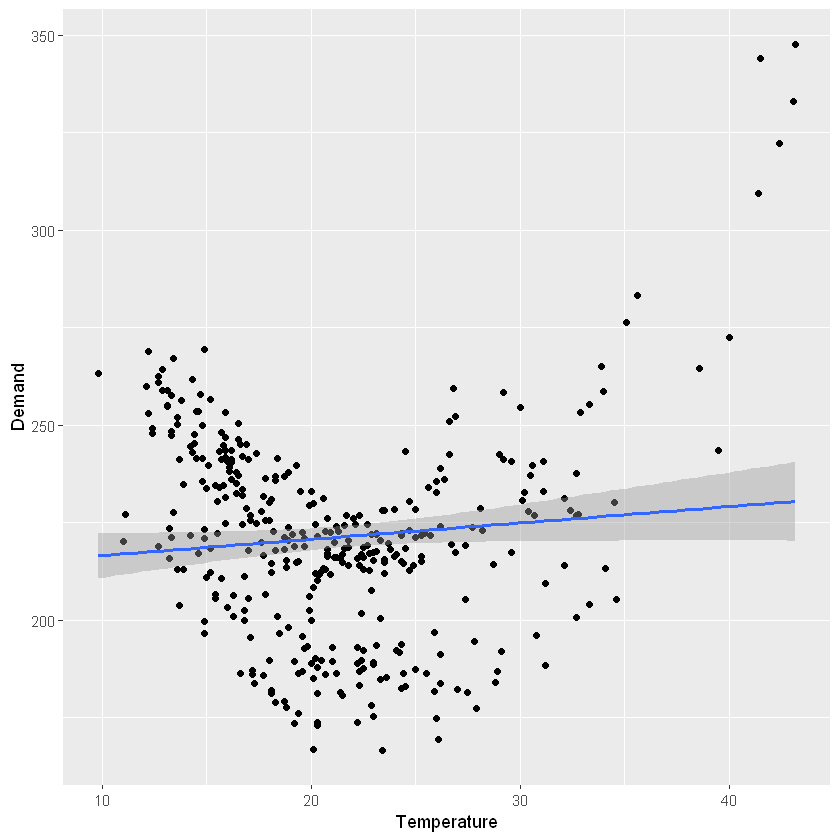

In [17]:
ggplot(df_daily_all, aes(x = Temperature, y = Demand)) + 
geom_point() +
geom_smooth(method='lm')